In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
df = pd.read_csv('/Users/kaciechong/Desktop/Gender.csv')
df

,Unnamed: 0,Academic Year of Participation,Academic Year of Participation.1,Academic Year of Participation.2,Academic Year of Participation.3,Academic Year of Participation.4
0,NaN,2020-21,2021-22,2022-23,2023-24,Grand Total
1,Female,70.8%,74.3%,68.4%,67.0%,68.7%
2,Gender queer/gender non-binary,NaN,0.9%,1.6%,2.1%,1.7%
3,Male,23.6%,21.3%,24.4%,26.0%,24.6%
4,Trans male/trans man,NaN,0.1%,0.2%,0.2%,0.2%
5,Decline to state/not reported,5.6%,3.5%,5.2%,4.5%,4.6%
6,Different identity,NaN,NaN,0.2%,0.2%,0.1%
7,Trans female/trans woman,NaN,NaN,0.1%,0.1%,0.1%


In [17]:
df = df.rename(columns={'Unnamed: 0': 'Gender'})
df = df.rename(columns={'Academic Year of Participation.4': 'Grand Total'})

df = df.drop(0)

df = df.drop('Academic Year of Participation', axis=1)
df = df.drop('Academic Year of Participation.1', axis=1)
df = df.drop('Academic Year of Participation.2', axis=1)
df = df.drop('Academic Year of Participation.3', axis=1)

In [18]:
df['Gender'] = df['Gender'].replace({
    'Gender queer/gender non-binary': 'Other',
    'Trans male/trans man': 'Other',
    'Decline to state/not reported': 'Other',
    'Different identity': 'Other',
    'Trans female/trans woman': 'Other'
})

df['Grand Total'] = df['Grand Total'].replace({'%': '', ',': ''}, regex=True).astype(float)

In [19]:
df = df.groupby('Gender', as_index=False).sum()

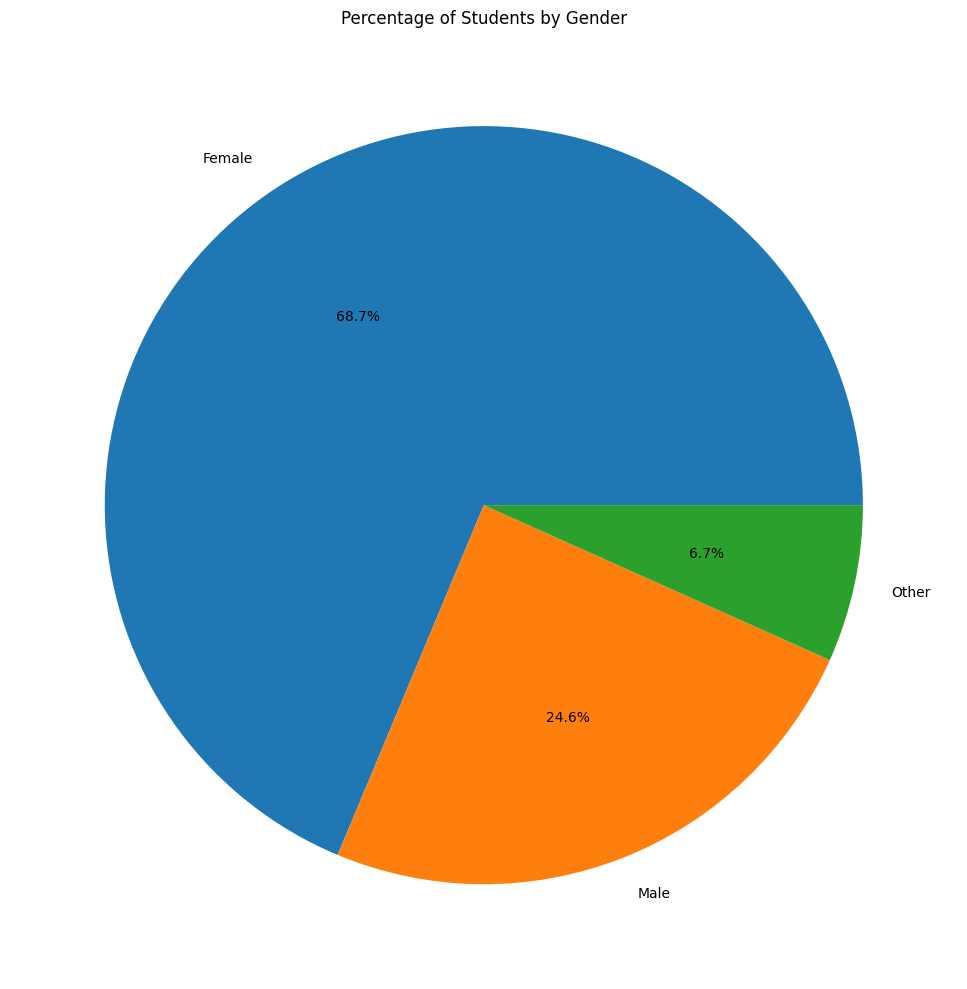

In [20]:
# Plot pie chart
plt.figure(figsize=(12, 10))
df.set_index('Gender')['Grand Total'].plot(kind='pie', autopct='%1.1f%%', legend=False)

# Title
plt.title("Percentage of Students by Gender")

# Show the plot
plt.ylabel('')  # To hide the y-axis label
plt.tight_layout()  
desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'Gender.png')

# Save the figure
plt.savefig(save_path, dpi=300)